In [7]:
import tensorflow as tf
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os

def get_metric(event_file, metric_name):
    metric_values = []
    
    events = 0
    for event in tf.compat.v1.train.summary_iterator(event_file):
        events += 1
        for value in event.summary.value:
            print(value)
            if value.tag == metric_name:
                metric_values.append(value.simple_value)

    print(events)
    return metric_values

import os

def get_xy(event_file, key):
    ea = event_accumulator.EventAccumulator(event_file)
    ea.Reload()
    steps = ea.Scalars(key)
    x = [step.step for step in steps]
    y = [step.value for step in steps]
    return x, y

def first_file(directory_path):
    # List all files and directories in the provided path
    files_and_dirs = os.listdir(directory_path)
    
    # If the directory is not empty
    if files_and_dirs:
        # Return the path of the first element
        return os.path.join(directory_path, files_and_dirs[0])
    else:
        return None 

def log_file(directory_path):
    # List all files and directories in the provided path
    files_and_dirs = os.listdir(directory_path)
    
    # If the directory is not empty
    if files_and_dirs:
        for f in files_and_dirs:
            if not f.endswith("png"):
                return os.path.join(directory_path, f)
    else:
        return None 

import matplotlib.pyplot as plt

def create_line_graph(x, y, name, title):
    plt.figure(figsize=(10, 6))  # Create a new figure with a specific size (optional)
    plt.plot(x, y)  # Create a line plot of y versus x
    plt.title(title)  # Set the title of the graph
    plt.xlabel('X')  # Set the label for the x-axis
    plt.ylabel('Y')  # Set the label for the y-axis
    plt.grid(True)  # Add a grid
    plt.savefig(f"{name}.png")  # Save the figure as a .png file


def graph(data, legend, name, title):
    plt.figure(figsize=(10, 6))  # Create a new figure with a specific size (optional)
    
    for i, (x, y) in enumerate(data):
        if len(x) != len(y):
            raise ValueError(f"Lengths of x and y at index {i} do not match!")
        plt.plot(x, y)  # Create a line plot of y versus x

    plt.title(title)  # Set the title of the graph
    plt.xlabel('X')  # Set the label for the x-axis
    plt.ylabel('Y')  # Set the label for the y-axis
    plt.grid(True)  # Add a grid
    plt.legend([f'{legend[i]}' for i in range(len(data))])  # Add a legend
    plt.savefig(f"{name}.png")  # Save the figure as a .png file

/home/sk/285/homework_fall2023/hw4_data/data_all


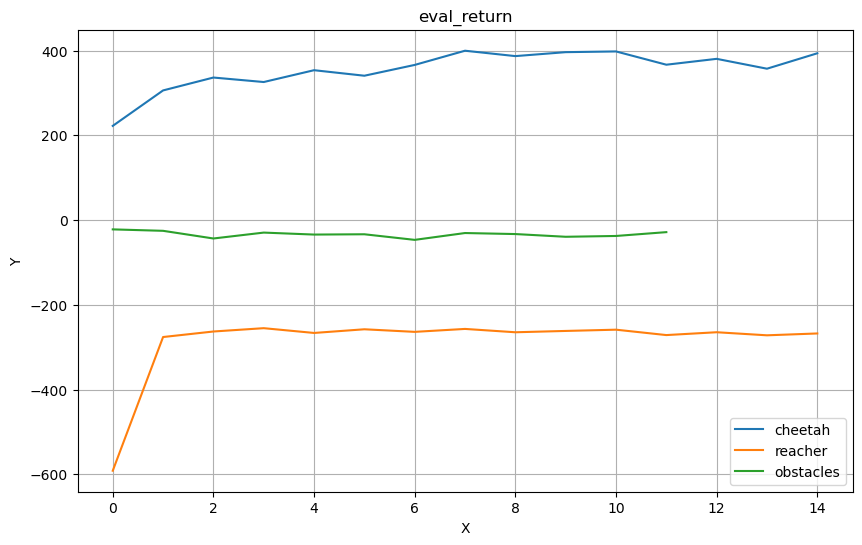

In [10]:
%cd /home/sk/285/homework_fall2023/hw4/data
# 2.4
file_names = [
"cheetah-cs285-v0_cheetah_multi_l2_h250_mpcrandom_horizon15_actionseq1000_03-11-2023_07-06-14",
"reacher-cs285-v0_reacher_multi_l2_h250_mpcrandom_horizon10_actionseq1000_03-11-2023_07-06-00",
"obstacles-cs285-v0_obstacles_multi_l2_h250_mpcrandom_horizon10_actionseq1000_03-11-2023_07-05-48"
]

log_file_names = [log_file(dir) for dir in file_names]

data = [get_xy(f, "eval_return") for f in log_file_names]

graph(data, ["cheetah", "reacher", "obstacles"], "4-3", "eval_return")


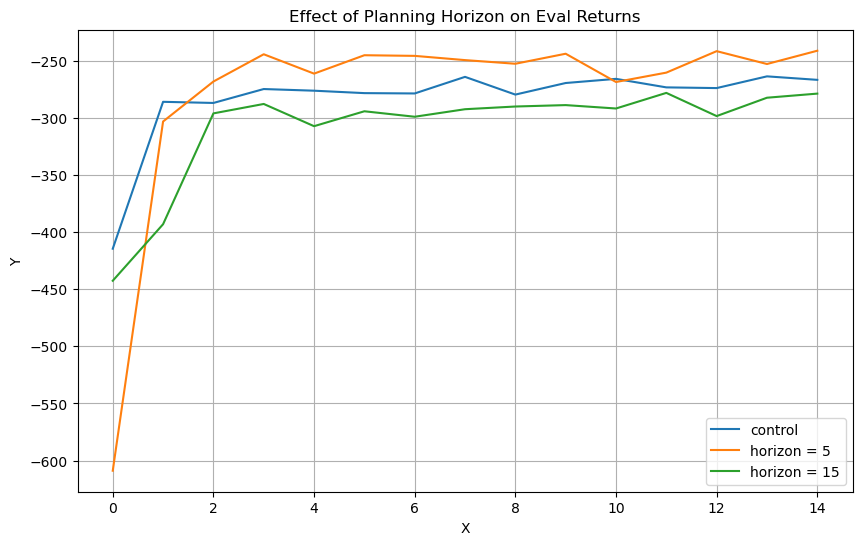

In [20]:
file_names_ph = [
    "reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon10_actionseq1000_03-11-2023_07-07-26",
    "reacher-cs285-v0_reacher_ablation_ph_down_l2_h250_mpcrandom_horizon5_actionseq1000_03-11-2023_07-16-10",
    "reacher-cs285-v0_reacher_ablation_ph_up_l2_h250_mpcrandom_horizon15_actionseq1000_03-11-2023_07-16-25"
]

log_file_names = [log_file(dir) for dir in file_names_ph]
data = [get_xy(f, "eval_return") for f in log_file_names]
graph(data, ["control", "horizon = 5", "horizon = 15"], "4-4-1", "Effect of Planning Horizon on Eval Returns")

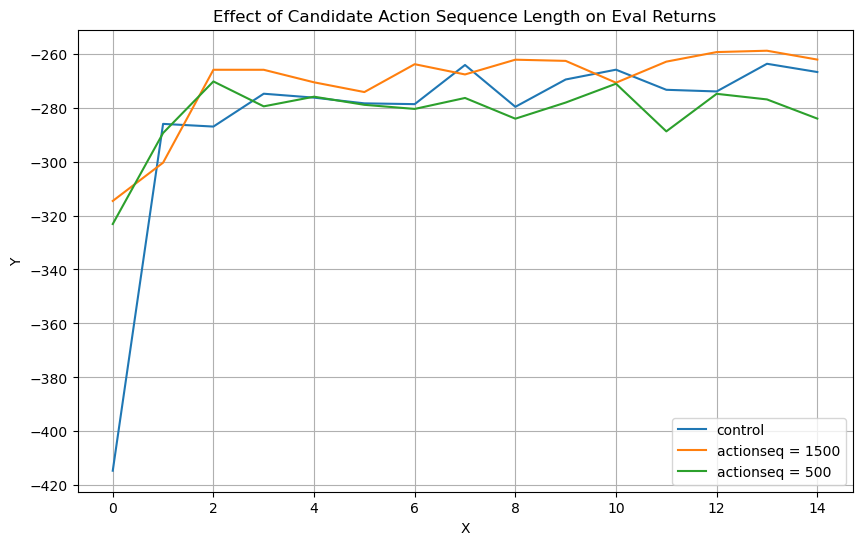

In [19]:
file_names_cas = [
    "reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon10_actionseq1000_03-11-2023_07-07-26",
    "reacher-cs285-v0_reacher_ablation_cas_up_l2_h250_mpcrandom_horizon10_actionseq1500_03-11-2023_07-15-38",
    "reacher-cs285-v0_reacher_ablation_cas_down_l2_h250_mpcrandom_horizon10_actionseq500_03-11-2023_07-15-52"
]

log_file_names = [log_file(dir) for dir in file_names_cas]
data = [get_xy(f, "eval_return") for f in log_file_names]
graph(data, ["control", "actionseq = 1500", "actionseq = 500"], "4-4-2", "Effect of Candidate Action Sequence Length on Eval Returns")

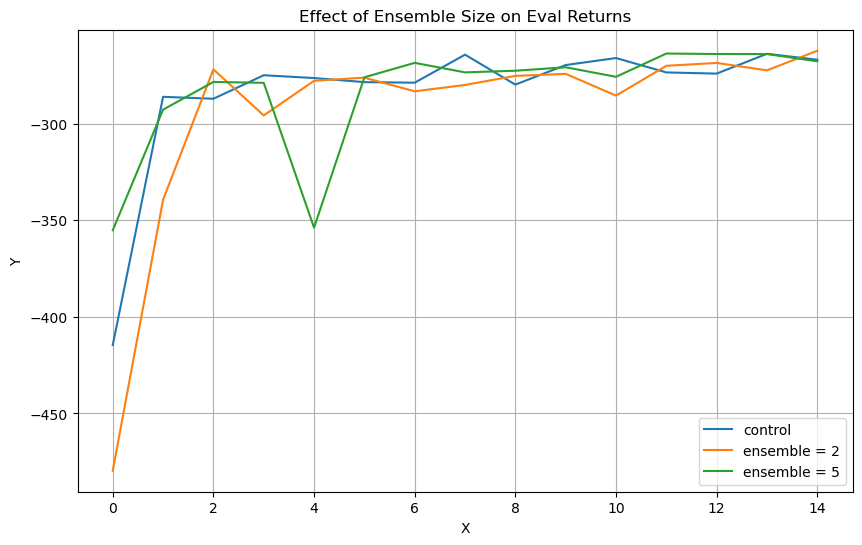

In [21]:
file_names_ensemble = [
    "reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon10_actionseq1000_03-11-2023_07-07-26",
    "reacher-cs285-v0_reacher_ablation_ensemble_up_l2_h250_mpcrandom_horizon10_actionseq1000_03-11-2023_07-55-09",
    "reacher-cs285-v0_reacher_ablation_ensemble_down_l2_h250_mpcrandom_horizon10_actionseq1000_03-11-2023_07-55-19"
]
log_file_names = [log_file(dir) for dir in file_names_ensemble]
data = [get_xy(f, "eval_return") for f in log_file_names]
graph(data, ["control", "ensemble = 2", "ensemble = 5"], "4-4-3", "Effect of Ensemble Size on Eval Returns")

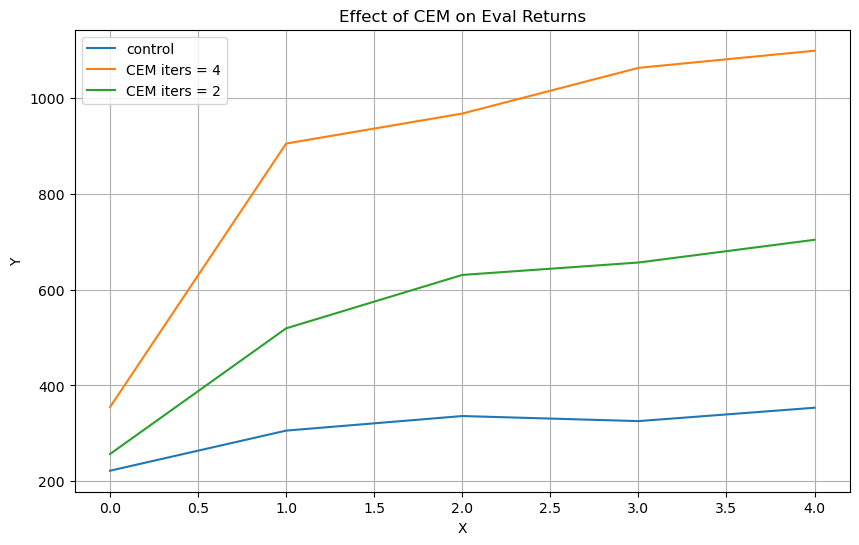

In [29]:
file_names_cem = [
"cheetah-cs285-v0_cheetah_multi_l2_h250_mpcrandom_horizon15_actionseq1000_03-11-2023_07-06-14",
"cheetah-cs285-v0_cheetah_cem_l2_h250_mpccem_horizon15_actionseq1000_cem_iters4_03-11-2023_08-03-10",
"cheetah-cs285-v0_cheetah_cem_2_l2_h250_mpccem_horizon15_actionseq1000_cem_iters2_03-11-2023_08-17-51"
]
log_file_names = [log_file(dir) for dir in file_names_cem]
data = [get_xy(f, "eval_return") for f in log_file_names]
datap = [(x[:5], y[:5]) for x, y in data]
graph(datap, ["control", "CEM iters = 4", "CEM iters = 2"], "4-5", "Effect of CEM on Eval Returns")

In [1]:
file_names_mbpo = [
    "cheetah-cs285-v0_cheetah_mbpo_l2_h250_mpcrandom_horizon10_actionseq1000_04-11-2023_00-49-04",
    "cheetah-cs285-v0_cheetah_mbpo_l2_h250_mpcrandom_horizon10_actionseq1000_04-11-2023_00-44-56",
    "cheetah-cs285-v0_cheetah_mbpo_l2_h250_mpcrandom_horizon10_actionseq1000_04-11-2023_00-44-17"
]

log_file_names = [log_file(dir) for dir in file_names_mbpo]
data = [get_xy(f, "eval_return") for f in log_file_names]
datap = [(x[:5], y[:5]) for x, y in data]
graph(datap, ["Baseline", "Dyno", "MBPO"], "4-6", "MBPO Method Comparison")

/home/sk


NameError: name 'log_file' is not defined